# CA684 Machine Learning Assignment Spring 2024

> ---
>
> Submission Details:
>
> <b>Student Name:</b> Veg Ghuikhedkar<br/>
> <b>Student No:</b> 23260451
>
> ---

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import nltk

from pathlib import Path

In [ ]:
!pip install pandas
!pip install pyarrow

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

# Download the punkt tokenizer models
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedgh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading Data

In [4]:
def read_parquet_files(folder_path, columns=None):
    # Get a list of all Parquet files in the folder
    parquet_files = [file for file in Path(folder_path).rglob('*.parquet')]
    
    # Read all Parquet files into a single DataFrame
    df = pd.concat([pd.read_parquet(file, columns=columns) for file in parquet_files], ignore_index=True)
    
    return df

In [26]:
# columns = ['product_id', 'title', 'description', 'tags', 'type', 'room',
#        'craft_type', 'recipient', 'material', 'occasion', 'holiday',
#        'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
#        'bottom_category_text', 'top_category_id', 'top_category_text',
#        'primary_color_id', 'primary_color_text', 'secondary_color_id',
#        'secondary_color_text', 'image/width',
#        'image/height']

In [5]:
df = read_parquet_files('train')

## Exploratory Data Analysis

In [5]:
df.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,426
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,475
2,1142910558,"Zebra print tutu, animal print Skirt, World bo...",All tutus are handmade to order with two layer...,"black and white tutu,striped skirt,zebra tutu,...",physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,17,white,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,396
3,1320296928,"Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...",Step aside because the princess pop star is he...,"tutu,girls skirt,sparkling tutu,fun skirt,ball...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,12,purple,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,854901795,Bumblebee tutu yellow and black tutu halloween...,"Sparkle, shimmer, twirl and spin,\nThis tutu&#...","dog tutu,fluffy tutu,dance tutu,skirt,flower g...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,18,yellow,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229624 entries, 0 to 229623
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            229624 non-null  int64 
 1   title                 229624 non-null  object
 2   description           229624 non-null  object
 3   tags                  229624 non-null  object
 4   type                  229624 non-null  object
 5   room                  229624 non-null  object
 6   craft_type            229624 non-null  object
 7   recipient             229624 non-null  object
 8   material              229624 non-null  object
 9   occasion              229624 non-null  object
 10  holiday               229624 non-null  object
 11  art_subject           229624 non-null  object
 12  style                 229624 non-null  object
 13  shape                 229624 non-null  object
 14  pattern               229624 non-null  object
 15  bottom_category_i

In [7]:
list(df.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'primary_color_id',
 'primary_color_text',
 'secondary_color_id',
 'secondary_color_text',
 'image/encoded',
 'image/width',
 'image/height']

In [8]:
import io


def show_images(df, N=10):

    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows

    plt.figure(figsize=(12, plt_height))
    for i, row in df[:N].iterrows():
        # axis
        ax = plt.subplot(num_rows, num_cols, i + 1)
        # data
        img_bytes = row["image/encoded"]
        label = row["top_category_text"] if "top_category_text" in row else "unknown"
        # image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)
        # plot
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(label, fontsize = 12)
    plt.show()

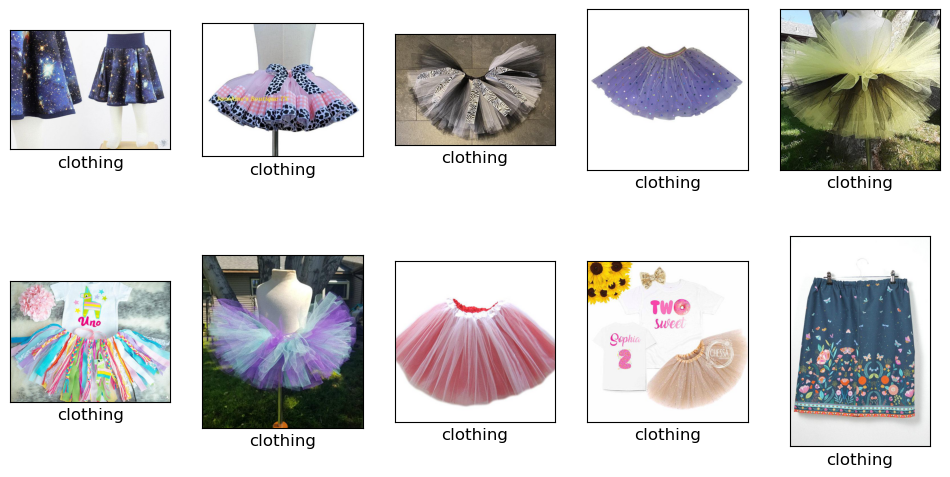

In [9]:
show_images(df)

In [10]:
df.describe(include='all')

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
count,2.296240e+05,229624,229624,229624,229624,229624,229624,229624,229624,229624,...,229624,229624.000000,229624,229624.000000,229624,229624.000000,229624,229624,229624.000000,229624.000000
unique,NaN,224252,216129,185370,3,19,78,26,77,63,...,2609,NaN,15,NaN,19,NaN,19,228155,NaN,NaN
top,NaN,,,,physical,,,,,,...,art_and_collectibles.drawing_and_illustration....,NaN,home_and_living,NaN,black,NaN,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,NaN,NaN
freq,NaN,810,810,31169,218568,220686,201862,218815,209384,171550,...,98,NaN,54600,NaN,30673,NaN,37332,27,NaN,NaN
mean,1.179276e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.991643,NaN,8.614731,NaN,9.505753,NaN,NaN,566.759690,566.725556
std,3.840381e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.605474,NaN,6.421168,NaN,6.433769,NaN,NaN,24.763315,157.274820
min,5.023404e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,79.000000,36.000000
25%,8.878686e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,570.000000,428.000000
50%,1.264325e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.000000,NaN,9.000000,NaN,10.000000,NaN,NaN,570.000000,570.000000
75%,1.515061e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000000,NaN,14.000000,NaN,16.000000,NaN,NaN,570.000000,665.000000


### Identifying Missing Values

In [11]:
df.isnull().sum()

product_id              0
title                   0
description             0
tags                    0
type                    0
room                    0
craft_type              0
recipient               0
material                0
occasion                0
holiday                 0
art_subject             0
style                   0
shape                   0
pattern                 0
bottom_category_id      0
bottom_category_text    0
top_category_id         0
top_category_text       0
primary_color_id        0
primary_color_text      0
secondary_color_id      0
secondary_color_text    0
image/encoded           0
image/width             0
image/height            0
dtype: int64

In [13]:
# Check for missing values
missing_values = []
for item in df:
    if item is None:
        missing_values.append(True)
    else:
        missing_values.append(False)
print(missing_values)


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [15]:
# Counting empty values in each column

def count_empty_strings(df):
    empty_strings = {}
    for column in df.columns:
        empty_strings[column] = len(df[df[column] == ""])
    return empty_strings

def get_missing_values(df):
    missing_values_counts = count_empty_strings(df)

    # Createing DataFrame from the dictionary with missing values counts and their percentages
    missing_values = pd.DataFrame.from_dict(missing_values_counts, orient='index', columns=['count'])
    missing_values['percentage'] = missing_values['count'] / len(df) * 100

    missing_values = missing_values[missing_values['count'] > 0]

    print(f"Number of columns with missing values: {len(missing_values):,}")

    return missing_values




In [16]:
get_missing_values(df)

Number of columns with missing values: 14


,count,percentage
title,810,0.352751
description,810,0.352751
tags,31169,13.573930
type,348,0.151552
room,220686,96.107550
craft_type,201862,87.909800
recipient,218815,95.292739
material,209384,91.185590
occasion,171550,74.709090
holiday,183359,79.851845


In [ ]:
df['tags']

0                                                          
1         birthday outfit,girls birthday shirt,Tutu outf...
2         black and white tutu,striped skirt,zebra tutu,...
3         tutu,girls skirt,sparkling tutu,fun skirt,ball...
4         dog tutu,fluffy tutu,dance tutu,skirt,flower g...
                                ...                        
229619    William the II,Fatherof Netherlands,Spain and ...
229620    vintage bank,Knickerbocker bank,Knickerbocker ...
229621    Antique Books,Vintage Books,Rare Books,Old Boo...
229622    paranormal book,supernatural,occult,time trave...
229623                                                     
Name: tags, Length: 229624, dtype: object

In [ ]:
df['style'].value_counts()

                213730
modern            1494
traditional       1149
retro             1134
cottage chic       993
                 ...  
tumblers             1
celtic               1
ceramic mugs         1
realism              1
cute                 1
Name: style, Length: 93, dtype: int64

In [ ]:
df['recipient'].value_counts()

                218815
women             3314
adult             2645
kids              1236
girls             1190
men               1028
babies             959
boys               244
animals             64
other               55
adult,women         19
adult,men           19
girls,women         10
babies,kids          5
men,women            3
boys,men             3
adult,kids           3
kids,women           2
girls,kids           2
babies,girls         2
adult,other          1
adult,boys           1
girls,other          1
adult,babies         1
other,women          1
adult,girls          1
Name: recipient, dtype: int64

In [ ]:
df['material'].value_counts()

                       209384
glass                    2935
ceramic                  2226
metal                    2081
wood                     1912
                        ...  
foam                        3
silver filled               3
sheepskin                   3
porcelain & ceramic         2
feather                     1
Name: material, Length: 77, dtype: int64

In [ ]:
df['craft_type'].value_counts()

                  201862
kids' crafts        2421
jewelry making      2168
sewing              1717
beading             1464
                   ...  
neon art              14
marbling               9
basket weaving         9
origami                5
tattooing              2
Name: craft_type, Length: 78, dtype: int64

### Checking outliers using boxplot

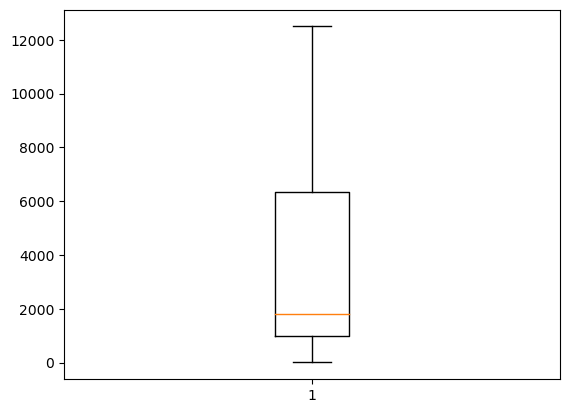

In [ ]:
plt.boxplot(df['bottom_category_id'])
plt.show()

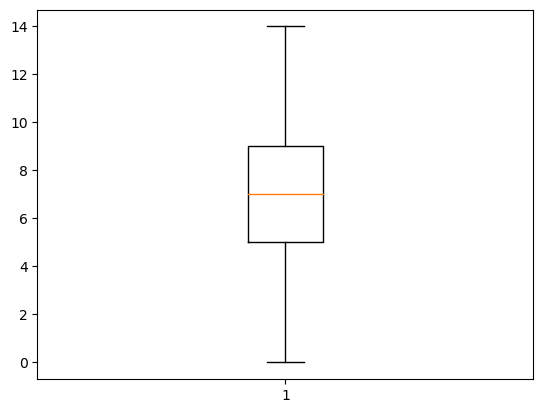

In [ ]:
plt.boxplot(df['top_category_id'])
plt.show()

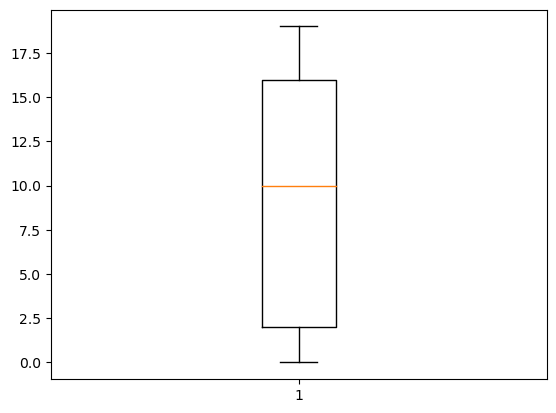

In [ ]:
plt.boxplot(df['secondary_color_id'])
plt.show()

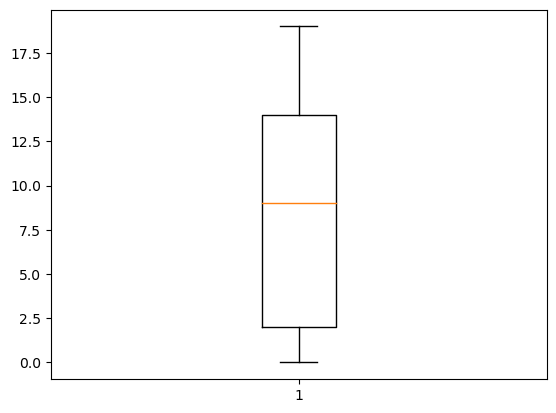

In [ ]:
def new_func():
    plt.boxplot(df['primary_color_id'])
    plt.show()

new_func()

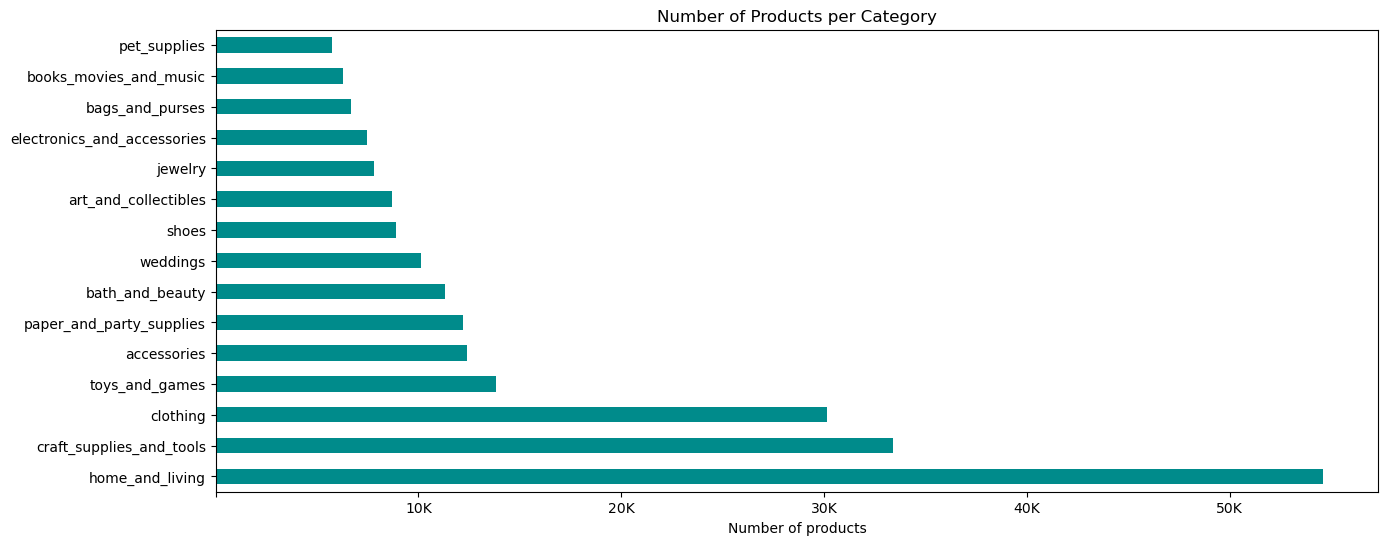

In [ ]:
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'

figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    df[column],
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

## Feature Selection

In [6]:
X_features = ['title', 'tags']
Y_features = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']

## Data Preprocessing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedgh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedgh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedgh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tfidf_vectorizer = TfidfVectorizer()

le_top = LabelEncoder()
le_bottom = LabelEncoder()
le_primary = LabelEncoder()
le_secondary = LabelEncoder()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Removing punctuation
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in string.punctuation and token not in stop_words]
    return " ".join(tokens)


def preprocess_train(dataframe):
    # Preprocess the 'title' and 'tags' columns
    X = dataframe[X_features]
    Y = dataframe[Y_features]

    X = [preprocess_text(" ".join(text)) for text in X.values]
    X = tfidf_vectorizer.fit_transform(X)

    Y['top_category_id'] = le_top.fit_transform(Y['top_category_id'])
    Y['bottom_category_id'] = le_bottom.fit_transform(Y['bottom_category_id'])
    Y['primary_color_id'] = le_primary.fit_transform(Y['primary_color_id'])
    Y['secondary_color_id'] = le_secondary.fit_transform(Y['secondary_color_id'])

    return X, Y

def preprocess_test(dataframe, tfidf):
    # Preprocess the 'title' and 'tags' columns
    X = dataframe[X_features]

    X = [preprocess_text(" ".join(text)) for text in X.values]
    X = tfidf.transform(X)
    return X

In [9]:
X, Y = preprocess_train(df)

C:\Users\vedgh\AppData\Local\Temp\ipykernel_10996\37772916.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['top_category_id'] = le_top.fit_transform(Y['top_category_id'])
C:\Users\vedgh\AppData\Local\Temp\ipykernel_10996\37772916.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['bottom_category_id'] = le_bottom.fit_transform(Y['bottom_category_id'])
C:\Users\vedgh\AppData\Local\Temp\ipykernel_10996\37772916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

## Splitting Dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

Defining helper methods

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit(X_train, y_train, model):
    model.fit(X_train, y_train)

def predict(X_test, model):
    return model.predict(X_test)

def evaluate_model(X_test, y_test, model):
    y_pred = predict(X_test, model)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

## MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB

multinomial_top = MultinomialNB()
multinomial_bottom = MultinomialNB()
multinomial_primary = MultinomialNB()
multinomial_secondary = MultinomialNB()

In [14]:
print("Training Model for Top Category")
fit(X_train, y_train['top_category_id'], multinomial_top)

print("Training Model for Bottom Category")
fit(X_train, y_train['bottom_category_id'], multinomial_bottom)

print("Training Model for Primary Color")
fit(X_train, y_train['primary_color_id'], multinomial_primary)

print("Training Model for Secondary Color")
fit(X_train, y_train['secondary_color_id'], multinomial_secondary)

Training Model for Top Category
Training Model for Bottom Category
Training Model for Primary Color
Training Model for Secondary Color


Evaluating for Top Category

In [15]:
evaluate_model(X_test, y_test['top_category_id'], multinomial_top)

Accuracy: 0.683745236799129
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.58      2497
           1       0.88      0.07      0.12      1680
           2       0.93      0.33      0.49      1308
           3       0.92      0.53      0.67      2266
           4       0.98      0.36      0.53      1239
           5       0.74      0.97      0.84      5911
           6       0.63      0.80      0.70      6779
           7       0.97      0.53      0.69      1469
           8       0.57      0.97      0.72     10941
           9       0.93      0.33      0.48      1656
          10       0.82      0.54      0.65      2390
          11       0.98      0.33      0.49      1222
          12       0.95      0.75      0.84      1735
          13       0.88      0.54      0.67      2758
          14       0.79      0.25      0.38      2074

    accuracy                           0.68     45925
   macro avg       0.85      

Evaluating for bottom category

In [16]:
evaluate_model(X_test, y_test['bottom_category_id'], multinomial_bottom)

Accuracy: 0.5368971148611867
Classification Report:


c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.40      0.10      0.15        21
           2       0.72      0.81      0.76        16
           3       0.52      0.83      0.64        18
           4       0.58      0.93      0.72        15
           5       0.50      0.17      0.25        12
           6       0.57      0.52      0.55        23
           7       0.52      0.79      0.63        14
           8       0.33      0.30      0.32        10
           9       0.41      0.69      0.51        13
          10       0.94      0.75      0.83        20
          11       0.50      0.12      0.19        17
          12       0.62      0.95      0.75        19
          13       0.55      0.89      0.68        18
          14       0.65      0.96      0.77        23
          15       0.14      0.14      0.14        21
          16       0.44      0.50      0.47        14
          17       0.54    

c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating for primary color

In [17]:
evaluate_model(X_test, y_test['primary_color_id'], multinomial_primary)

Accuracy: 0.28487751769188896
Classification Report:


              precision    recall  f1-score   support

           0       0.78      0.02      0.05      2506
           1       0.27      0.66      0.38      6031
           2       0.26      0.54      0.35      5582
           3       0.00      0.00      0.00       509
           4       0.41      0.33      0.37      3964
           5       0.67      0.01      0.02       880
           6       0.00      0.00      0.00       359
           7       0.63      0.17      0.27      1914
           8       0.59      0.07      0.12      3145
           9       0.00      0.00      0.00      1090
          10       0.49      0.07      0.13      3238
          11       0.80      0.00      0.01      1370
          12       1.00      0.00      0.00       855
          13       0.49      0.05      0.08      3119
          14       0.00      0.00      0.00       173
          15       0.57      0.26      0.36      2169
          16       0.23      0.56      0.33      5721
          17       0.67    

c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating for secondary color

In [18]:
evaluate_model(X_test, y_test['secondary_color_id'], multinomial_secondary)

Accuracy: 0.2202068590092542
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.00      0.01      2014
           1       0.26      0.37      0.31      5999
           2       0.42      0.02      0.04      3570
           3       0.00      0.00      0.00       599
           4       0.40      0.08      0.13      3231
           5       0.83      0.01      0.01       862
           6       0.00      0.00      0.00       374
           7       0.39      0.13      0.19      3046
           8       0.44      0.04      0.07      3058
           9       0.00      0.00      0.00      1237
          10       0.62      0.00      0.01      2602
          11       0.00      0.00      0.00      1138
          12       1.00      0.00      0.00      1154
          13       0.40      0.01      0.02      3102
          14       0.00      0.00      0.00       224
          15       0.42      0.18      0.25      2707
          16       0.19      

c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vedgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linear_top = LinearRegression()
linear_bottom = LinearRegression()
linear_primary = LinearRegression()
linear_secondary = LinearRegression()

In [32]:
print("Training Model for Top Category")
fit(X_train, y_train['top_category_id'], linear_top)

print("Training Model for Bottom Category")
fit(X_train, y_train['bottom_category_id'], linear_bottom)

print("Training Model for Primary Color")
fit(X_train, y_train['primary_color_id'], linear_primary)

print("Training Model for Secondary Color")
fit(X_train, y_train['secondary_color_id'], linear_secondary)

Training Model for Top Category
Training Model for Bottom Category
Training Model for Primary Color
Training Model for Secondary Color


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_regression_model(X_test, y_test, model):
    y_pred = predict(X_test, model)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

In [34]:
evaluate_regression_model(X_test, y_test['top_category_id'], linear_top)

Mean Squared Error: 12.073723151641088
R2 Score: 0.0700790441365311
Mean Absolute Error: 2.1455872798891034


In [35]:
evaluate_regression_model(X_test, y_test['bottom_category_id'], linear_bottom)

Mean Squared Error: 733396.0028163764
R2 Score: -0.3088638614759531
Mean Absolute Error: 564.8316643124818


In [36]:
evaluate_regression_model(X_test, y_test['primary_color_id'], linear_primary)

Mean Squared Error: 73.39716650751829
R2 Score: -1.0522534040811746
Mean Absolute Error: 5.722519009159773


In [37]:
evaluate_regression_model(X_test, y_test['secondary_color_id'], linear_secondary)

Mean Squared Error: 81.91459091940298
R2 Score: -1.2821556846728521
Mean Absolute Error: 6.227017675553936


## Xgboost

In [22]:
from xgboost import XGBClassifier


In [23]:
xgb_top = XGBClassifier()
xgb_bottom = XGBClassifier()
xgb_primary = XGBClassifier()
xgb_secondary = XGBClassifier()

In [24]:
print("Training Model for Top Category")
fit(X_train, y_train['top_category_id'], xgb_top)

#print("Training Model for Bottom Category")
#fit(X_train, y_train['bottom_category_id'], xgb_bottom)

print("Training Model for Primary Color")
fit(X_train, y_train['primary_color_id'], xgb_primary)

print("Training Model for Secondary Color")
fit(X_train, y_train['secondary_color_id'], xgb_secondary)

Training Model for Top Category
Training Model for Primary Color
Training Model for Secondary Color


In [25]:
evaluate_model(X_test, y_test['top_category_id'], xgb_top)

Accuracy: 0.8223189983669026
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2497
           1       0.75      0.53      0.62      1680
           2       0.78      0.83      0.81      1308
           3       0.88      0.80      0.83      2266
           4       0.85      0.82      0.83      1239
           5       0.93      0.92      0.93      5911
           6       0.86      0.76      0.81      6779
           7       0.91      0.81      0.85      1469
           8       0.74      0.91      0.82     10941
           9       0.82      0.87      0.84      1656
          10       0.82      0.77      0.79      2390
          11       0.91      0.89      0.90      1222
          12       0.94      0.96      0.95      1735
          13       0.84      0.77      0.80      2758
          14       0.72      0.62      0.67      2074

    accuracy                           0.82     45925
   macro avg       0.84     

In [148]:
evaluate_model(X_test, y_test['bottom_category_id'], xgb_bottom)

Accuracy: 0.856
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.41      0.53      0.46        17
           2       0.75      0.82      0.78        11
           3       0.83      0.79      0.81        24
           4       0.54      0.44      0.48        16
           5       0.80      0.60      0.69        20
           6       0.88      1.00      0.94        15
           7       0.93      1.00      0.96        26
           8       0.72      0.86      0.78        21
           9       0.90      0.95      0.93        20
          10       0.95      0.95      0.95        21
          11       0.81      0.81      0.81        16
          12       0.83      0.50      0.62        20
          13       0.73      0.79      0.76        24
          14       0.89      0.94      0.91        17
          15       0.88      0.82      0.85        17
          16       0.96      0.96      0.9

In [26]:
evaluate_model(X_test, y_test['primary_color_id'], xgb_primary)

Accuracy: 0.48289602612955906
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.25      0.33      2506
           1       0.37      0.64      0.47      6031
           2       0.53      0.54      0.53      5582
           3       0.59      0.37      0.45       509
           4       0.50      0.52      0.51      3964
           5       0.49      0.47      0.48       880
           6       0.65      0.55      0.59       359
           7       0.58      0.53      0.55      1914
           8       0.60      0.43      0.50      3145
           9       0.51      0.35      0.42      1090
          10       0.58      0.53      0.55      3238
          11       0.62      0.46      0.53      1370
          12       0.48      0.31      0.38       855
          13       0.53      0.47      0.50      3119
          14       0.57      0.38      0.46       173
          15       0.61      0.57      0.59      2169
          16       0.37     

In [27]:
evaluate_model(X_test, y_test['secondary_color_id'], xgb_secondary)

Accuracy: 0.31984757757212845
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.13      0.20      2014
           1       0.33      0.33      0.33      5999
           2       0.30      0.20      0.24      3570
           3       0.40      0.20      0.27       599
           4       0.34      0.33      0.34      3231
           5       0.46      0.32      0.38       862
           6       0.36      0.26      0.31       374
           7       0.48      0.44      0.46      3046
           8       0.33      0.24      0.28      3058
           9       0.32      0.18      0.23      1237
          10       0.33      0.27      0.30      2602
          11       0.32      0.21      0.25      1138
          12       0.34      0.19      0.25      1154
          13       0.33      0.24      0.27      3102
          14       0.42      0.24      0.30       224
          15       0.45      0.43      0.44      2707
          16       0.25     

Making a sample prediction

In [30]:
def sample_prediction(record):
    print("----- Record -----")
    print("Title:", record['title'].values[0])
    print("Tags:", record['tags'].values[0])
    print("----- Actual Values -----")
    print(f"Top Category: {record['top_category_id'].values[0]}")
    print(f"Bottom Category: {record['bottom_category_id'].values[0]}")
    print(f"Primary Color: {record['primary_color_id'].values[0]}")
    print(f"Secondary Color: {record['secondary_color_id'].values[0]}")

    X = preprocess_test(record, tfidf_vectorizer)
    top_category_id = predict(X, xgb_top)
    bottom_category_id = predict(X, xgb_bottom)
    primary_color_id = predict(X, xgb_primary)
    secondary_color_id = predict(X, xgb_secondary)

    print("----- Predicted Values -----")
    print(f"Top Category: {le_top.inverse_transform(top_category_id)}")
    print(f"Bottom Category: {le_bottom.inverse_transform(bottom_category_id)}")
    print(f"Primary Color: {le_primary.inverse_transform(primary_color_id)}")
    print(f"Secondary Color: {le_secondary.inverse_transform(secondary_color_id)}")

In [31]:
sample_prediction(df.sample(1))

----- Record -----
Title: Silver Long Handled Powder Puff, Handmade with Opulent Sheepskin Applicator, Extra Large Size
Tags: powder puff,merino wool,powder applicator,natural fiber puff,luxury powder puff,bridal powder puff,heirloom quality,sheepskin puff,dusting powder puff,fluffy vanity puff,bridesmaid gift,long handle puff,vanity accessory
----- Actual Values -----
Top Category: 3
Bottom Category: 212
Primary Color: 17
Secondary Color: 16
----- Predicted Values -----
Top Category: [3]
Bottom Category: [212]
Primary Color: [16]
Secondary Color: [16]


# Submission

In [32]:
df_test = read_parquet_files('test')

In [33]:
test_x = preprocess_test(df_test, tfidf_vectorizer)

In [34]:
df_test['top_category_id'] = le_top.inverse_transform(predict(test_x, xgb_top))
df_test['bottom_category_id'] = le_bottom.inverse_transform(predict(test_x, xgb_bottom))
df_test['primary_color_id'] = le_primary.inverse_transform(predict(test_x, xgb_primary))
df_test['secondary_color_id'] = le_secondary.inverse_transform(predict(test_x, xgb_secondary))

In [35]:
student_id = "23260451"
df_test[
    ["product_id", "top_category_id", "bottom_category_id", "primary_color_id", "secondary_color_id"]
].to_parquet(f"predictions_{student_id}.parquet")

In [36]:
df_test.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,style,shape,pattern,image/encoded,image/width,image/height,top_category_id,bottom_category_id,primary_color_id,secondary_color_id
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen...",physical,,kids' crafts,,,,...,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,739,6,1279,14,14
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay",physical,,drawing & drafting,,,,...,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321,8,6350,1,17
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p...",physical,,drawing & drafting,,,,...,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,330,6,6752,4,1
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent...",physical,,drawing & drafting,,,birthday,...,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570,6,6752,4,1
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe...",physical,,calligraphy,,,,...,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570,6,6752,11,1
